In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
import time
from tensorflow.keras.models import Sequential

# Training Data

In [2]:
DATADIR = "My_Dataset/train"
CATEGORIES = [ f.name for f in os.scandir(DATADIR) if f.is_dir() ]

In [3]:
#print(CATEGORIES)

In [4]:
len(CATEGORIES)

152

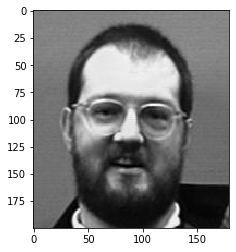

In [8]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        #img_array = cv2.imread(os.path.join(path,img) )  
        #plt.imshow(img_array) 
        plt.show()  

        break  
    break

In [6]:
print(img_array.shape)

(200, 180, 3)


(227, 227)


<function matplotlib.pyplot.show(*args, **kw)>

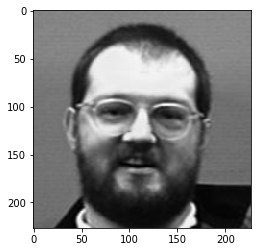

In [9]:
IMG_SIZE = 227

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
print(new_array.shape)
plt.imshow(new_array, cmap='gray')
plt.show

In [10]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in os.listdir(path):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                training_data.append([new_array, class_num])  
            except Exception as e:  
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

2736


In [11]:
import random

random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

In [13]:
X_train = []
y_train = []

for features,label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [14]:
import pickle

pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

In [15]:
pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

# Test Data

In [16]:
DATADIR = "My_Dataset/test"
CATEGORIES = [ f.name for f in os.scandir(DATADIR) if f.is_dir() ]

In [17]:
len(CATEGORIES)

152

In [18]:
testing_data = []

def create_testing_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in os.listdir(path):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                testing_data.append([new_array, class_num])  
            except Exception as e:  
                pass

create_testing_data()

print(len(testing_data))

304


In [19]:
import random

random.shuffle(testing_data)

for sample in testing_data[:10]:
    print(sample[1])

57
4
104
16
142
19
13
45
47
20


In [20]:
X_test = []
y_test = []

for features,label in testing_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [21]:
import pickle

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [22]:
pickle_in = open("X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb")
y_test = pickle.load(pickle_in)

# Model

In [25]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(len(CATEGORIES), activation='softmax')
])


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=0.001), 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 55, 55, 96)        11712     
_________________________________________________________________
batch_normalization_5 (Batch (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_6 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 384)      

In [26]:
r = model.fit(X_train, y_train, batch_size=32, epochs=7, validation_split=0.1)

Train on 2462 samples, validate on 274 samples
Epoch 1/7
2462/2462 [==============================] - 397s 161ms/sample - loss: 6.0749 - acc: 0.0418 - val_loss: 4.8853 - val_acc: 0.0292
Epoch 2/7
2462/2462 [==============================] - 396s 161ms/sample - loss: 3.1619 - acc: 0.2888 - val_loss: 3.7516 - val_acc: 0.4124
Epoch 3/7
2462/2462 [==============================] - 396s 161ms/sample - loss: 1.7464 - acc: 0.6133 - val_loss: 1.5732 - val_acc: 0.9818
Epoch 4/7
2462/2462 [==============================] - 396s 161ms/sample - loss: 1.0243 - acc: 0.7985 - val_loss: 0.4494 - val_acc: 1.0000
Epoch 5/7
2462/2462 [==============================] - 397s 161ms/sample - loss: 0.6140 - acc: 0.8960 - val_loss: 0.1182 - val_acc: 1.0000
Epoch 6/7
2462/2462 [==============================] - 397s 161ms/sample - loss: 0.3985 - acc: 0.9342 - val_loss: 0.0523 - val_acc: 1.0000
Epoch 7/7
2462/2462 [==============================] - 397s 161ms/sample - loss: 0.3017 - acc: 0.9630 - val_loss: 0.023

In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test)

304/304 [==============================] - 7s 24ms/sample - loss: 0.0283 - acc: 1.0000


In [28]:
model.save("Face Recognition With AlexNet")

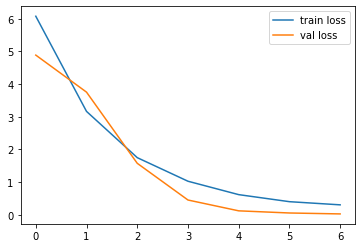

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

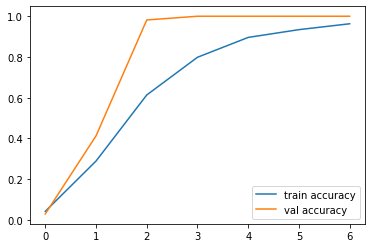

<Figure size 432x288 with 0 Axes>

In [30]:
# accuracies
plt.plot(r.history['acc'], label='train accuracy')
plt.plot(r.history['val_acc'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [7]:
new_model = tf.keras.models.load_model("Face Recognition With AlexNet")